<a href="https://colab.research.google.com/github/nikhilgunti/Deep-Learning/blob/master/MNIST_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import ZeroPadding2D
from tensorflow.python.keras.layers import Activation, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import adam
from keras.utils import np_utils

In [0]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [8]:
X_train.shape
X_test.shape

(60000, 28, 28)

(10000, 28, 28)

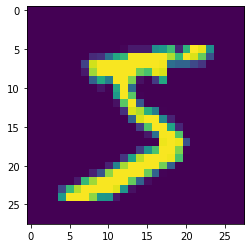

In [9]:
plt.imshow(X_train[0])

CNN architecture  - VGG16

In [0]:
# network parameters 
batch_size = 60
num_classes = 10
epochs = 5 # Further Fine Tuning can be done
nb_train_samples = 60000
nb_valid_samples = 10000

# input image dimensions
img_rows, img_cols = 28, 28

# preprocess the train data 
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# preprocess the validation data
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

input_shape = (img_rows, img_cols, 1)

Y_train = np_utils.to_categorical(Y_train, num_classes=10)
Y_test = np_utils.to_categorical(Y_test, num_classes=10)

In [24]:
Y_test.shape

(10000, 10)

In [25]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = input_shape))
model.add(ZeroPadding2D(padding=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)        

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
result = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
1000/1000 [==============================] - 33s 33ms/step - loss: 2.3022 - accuracy: 0.1112 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/5
1000/1000 [==============================] - 33s 33ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/5
1000/1000 [==============================] - 32s 32ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
1000/1000 [==============================] - 33s 33ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 5/5
1000/1000 [==============================] - 32s 32ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135


In [32]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[2.3012428283691406, 0.11349999904632568]

In [33]:
# summarize history for accuracy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored